# Imports

In [1]:
import pandas as pd
import numpy as np
import warnings
import random
from typing import Dict, Any, List
import os
import gc
import re

import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display


gc.enable()
warnings.simplefilter("ignore")

# Utilities

In [2]:
DEFAULT_REFERENCES_TITLES = ["Reference", "References", "Work Cited", "Works Cited", "Work cited", "Works cited"]
DEFAULT_SPECIAL_SYMBOLS = [r"\n", r"\xa0", r"\t", r"\r"]


def read_file(path: str, mode: str = "r", encoding: str = "utf-8", **kwargs) -> Dict[str, Any]:
    with open(path, mode=mode, encoding=encoding, **kwargs) as file:
        data = file.read()
        
    return data

def remove_urls(text: str) -> str:
    pattern = r'(http\S+)|(https\S+)|(www.\S+)'
    text = re.sub(pattern, '', text)

    
    return text

def remove_special_symbols(
    text: str, 
    special_symbols: List[str] = DEFAULT_SPECIAL_SYMBOLS, 
    replace_value: str = " ",
) -> str:
    for special_symbol in special_symbols:
        text = re.sub(special_symbol, replace_value, text)
        
    return text


def remove_brackets(text: str) -> str:
    return re.sub("[\(\[].*?[\)\]]", "", text)

def remove_extra_spaces(text: str, remove_spaces_before_punctionations: bool = True) -> str:
    text = re.sub(' +', ' ', text)
    
    if remove_spaces_before_punctionations:
        text = re.sub(r'\s([?.!"](?:\s|$))', "", text) # removes spaces before punctuations
    
    return text

def remove_reference_content(text: str, titles: List[str] = DEFAULT_REFERENCES_TITLES) -> str:
    for title in titles:
        try:
            title_index = text.find(title)
            if title_index > 0:
                text = text[:title_index]
        except:
            pass
        
    return text

# Competition data

In [3]:
feedback_prize_ell_directory = "../input/feedback-prize-english-language-learning/"
feedback_prize_ell_train_path = os.path.join(feedback_prize_ell_directory, "train.csv")
feedback_prize_ell_test_path = os.path.join(feedback_prize_ell_directory, "test.csv")

feedback_prize_ell_train = pd.read_csv(feedback_prize_ell_train_path)
feedback_prize_ell_train["source"] = "Feedback Prize ELL"

feedback_prize_ell_test = pd.read_csv(feedback_prize_ell_test_path)
feedback_prize_ell_test["source"] = "Feedback Prize ELL"
gc.collect()

display(feedback_prize_ell_test.head())

,text_id,full_text,source
0,0000C359D63E,when a person has no experience on a job their...,Feedback Prize ELL
1,000BAD50D026,Do you think students would benefit from being...,Feedback Prize ELL
2,00367BB2546B,"Thomas Jefferson once states that ""it is wonde...",Feedback Prize ELL


# Feedback Prize 2021

In [4]:
feedback_prize_2021_directory = "../input/feedback-prize-2021/"
feedback_prize_2021_train_directory = os.path.join(feedback_prize_2021_directory, "train")
feedback_prize_2021_train_path = os.path.join(feedback_prize_2021_directory, "train.csv")

feedback_prize_2021_train = pd.read_csv(feedback_prize_2021_train_path)
feedback_prize_2021_train = feedback_prize_2021_train.drop_duplicates(subset=["id"], keep="first")
feedback_prize_2021_train = feedback_prize_2021_train.reset_index(drop=True)

# remove similar texts to Competition data
feedback_prize_ell_ids = feedback_prize_ell_train["text_id"].values
feedback_prize_intersect_mask = feedback_prize_2021_train["id"].isin(feedback_prize_ell_ids)
feedback_prize_2021_train = feedback_prize_2021_train[~feedback_prize_intersect_mask].reset_index(drop=True)

columns = ["id"]
feedback_prize_2021_train = feedback_prize_2021_train[columns]
get_essay_path = lambda id, directory: os.path.join(directory, f"{id}.txt")
feedback_prize_2021_train["path"] = feedback_prize_2021_train["id"].apply(lambda id: get_essay_path(id, feedback_prize_2021_train_directory))
feedback_prize_2021_train["full_text"] = feedback_prize_2021_train["path"].apply(read_file)

columns = ["text_id", "full_text", "source"]
feedback_prize_2021_train = feedback_prize_2021_train.rename(columns={"id": "text_id"})
feedback_prize_2021_train["source"] = "Feedback Prize 2021"
feedback_prize_2021_train = feedback_prize_2021_train[columns]
gc.collect()

display(feedback_prize_2021_train)

,text_id,full_text,source
0,423A1CA112E2,Phones\n\nModern humans today are always on th...,Feedback Prize 2021
1,A8445CABFECE,Phones & Driving\n\nDrivers should not be able...,Feedback Prize 2021
2,6B4F7A0165B9,Cell Phone Operation While Driving\n\nThe abil...,Feedback Prize 2021
3,E05C7F5C1156,People are debating whether if drivers should ...,Feedback Prize 2021
4,50B3435E475B,Texting and driving\n\nOver half of drivers in...,Feedback Prize 2021
...,...,...,...
15137,0814426B27DF,Most people ask more than one person for advic...,Feedback Prize 2021
15138,8F4B595CF9E7,Do you ever want more opinions and options whe...,Feedback Prize 2021
15139,6B5809C83978,Has anyone ever gave you advice? Was the advic...,Feedback Prize 2021
15140,AFEC37C2D43F,There has been at least one point in everyone'...,Feedback Prize 2021


# Essayscsv

In [5]:
essayscsv_path = "../input/essayscsv/essays.csv"
essayscsv = pd.read_csv(essayscsv_path, encoding="cp1252")

columns = ["#AUTHID", "TEXT"]
essayscsv = essayscsv[columns]

rename_columns = {
    "#AUTHID": "text_id",
    "TEXT": "full_text",
}

essayscsv = essayscsv.rename(columns=rename_columns)
essayscsv["text_id"] = essayscsv["text_id"].apply(lambda x: x.split(".")[0])
essayscsv["source"] = "essayscsv"
gc.collect()

display(essayscsv)

,text_id,full_text,source
0,1997_504851,"Well, right now I just woke up from a mid-day ...",essayscsv
1,1997_605191,"Well, here we go with the stream of consciousn...",essayscsv
2,1997_687252,An open keyboard and buttons to push. The thin...,essayscsv
3,1997_568848,I can't believe it! It's really happening! M...,essayscsv
4,1997_688160,"Well, here I go with the good old stream of co...",essayscsv
...,...,...,...
2462,2004_493,I'm home. wanted to go to bed but remembe...,essayscsv
2463,2004_494,Stream of consiousnesssskdj. How do you s...,essayscsv
2464,2004_497,"It is Wednesday, December 8th and a lot has be...",essayscsv
2465,2004_498,"Man this week has been hellish. Anyways, now i...",essayscsv


# IvyPanda

In [6]:
def preprocess_ivypanda_text(text: str) -> str:
    text = remove_urls(text)
    text = remove_reference_content(text)
    text = remove_brackets(text)
    text = remove_extra_spaces(text)
    
    return text

In [7]:
ivypanda_directory = "../input/ivypanda/"

ivypanda_1pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_1pages_essays.csv")
ivypanda_1pages_essays = pd.read_csv(ivypanda_1pages_essays_path)

ivypanda_2pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_2pages_essays.csv")
ivypanda_2pages_essays = pd.read_csv(ivypanda_2pages_essays_path)

ivypanda_3pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_3pages_essays.csv")
ivypanda_3pages_essays = pd.read_csv(ivypanda_3pages_essays_path)

ivypanda_4pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_4pages_essays.csv")
ivypanda_4pages_essays = pd.read_csv(ivypanda_4pages_essays_path)

ivypanda_5pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_5pages_essays.csv")
ivypanda_5pages_essays = pd.read_csv(ivypanda_5pages_essays_path)

ivypanda_6pages_essays_path = os.path.join(ivypanda_directory, "ivypanda_6pages_essays.csv")
ivypanda_6pages_essays = pd.read_csv(ivypanda_6pages_essays_path)

ivypanda_datasets = [
    ivypanda_1pages_essays, ivypanda_2pages_essays, ivypanda_3pages_essays, 
    ivypanda_4pages_essays, ivypanda_5pages_essays, ivypanda_6pages_essays,
]

ivypanda = pd.concat(ivypanda_datasets, axis=0)

# removing NaN values and duplicates
ivypanda = ivypanda.dropna(axis=0, subset=["text", "type"])
ivypanda = ivypanda.drop_duplicates(subset=["text"]).reset_index(drop=True)

# type selection
essays_mask = ivypanda["type"].str.lower().str.contains("essay")
ivypanda = ivypanda[essays_mask]

rename_columns = {"index": "text_id", "text": "full_text"}
ivypanda = ivypanda.rename(columns=rename_columns)
ivypanda["source"] = "IvyPanda"
ivypanda["text_id"] = range(len(ivypanda))


# pre-processing
ivypanda["full_text"] = ivypanda["full_text"].apply(preprocess_ivypanda_text)

columns = ["text_id", "full_text", "source"]
ivypanda = ivypanda[columns]
gc.collect()

display(ivypanda)

,text_id,full_text,source
1,0,"People are curious about a lot of things, some...",IvyPanda
2,1,A true profession is characterized by a lifeti...,IvyPanda
3,2,The Tang dynasty started ruling China from 618...,IvyPanda
4,3,"In the story Mrs. Dutta writes aletter,we enco...",IvyPanda
5,4,"Media includes television, movies, radios, new...",IvyPanda
...,...,...,...
94749,63703,"Introduction\n\nThe purchase, implementation, ...",IvyPanda
94751,63704,The article by Wang contains an analysis of a ...,IvyPanda
94753,63705,Introduction\n\nMost biological processes requ...,IvyPanda
94759,63706,Introduction: Marijuana in the Workplace\n\nMa...,IvyPanda


# StudentShare

In [8]:
def preprocess_studentshare_text(text: str) -> str:
    text = remove_special_symbols(text, special_symbols=[r"\t", r"\xa0"])
    text = remove_brackets(text)
    text = remove_reference_content(text)
    text = remove_extra_spaces(text)
    text = remove_urls(text)
    
    return text

In [10]:
studentshare_path = "../input/studentshare/studentshare_essays.csv"
studentshare = pd.read_csv(studentshare_path)
studentshare["source"] = "StudentShare"

studentshare = studentshare.rename(columns={"text": "full_text"})

# type selection
studentshare = studentshare.dropna(axis=0, subset=["full_text", "type"])
essays_mask = studentshare["type"].str.lower().str.contains("essay")
studentshare = studentshare[essays_mask]

# pre-processing
studentshare["full_text"] = studentshare["full_text"].apply(preprocess_studentshare_text)

columns = ["text_id", "full_text", "source"]
studentshare["text_id"] = range(0, len(studentshare))
studentshare = studentshare[columns]
gc.collect()

display(studentshare)

,text_id,full_text,source
0,0,Goals of Education INTRODUCTION The Cal Grant ...,StudentShare
1,1,Child Obesity. Articles Overview Introduction ...,StudentShare
2,2,"24 April, In order to communicate effectively ...",StudentShare
3,3,"Euthyphro – Plato On the one hand, Euthyphro a...",StudentShare
4,4,Ali Bujassoum Kelly Gehlhoff ENG 101 28th Apri...,StudentShare
...,...,...,...
32972,32386,The paper 'The Cost of Maintaining a Professio...,StudentShare
32973,32387,Critical Analysis Tool\n\nTopic: The Adoption ...,StudentShare
32974,32388,Due to their ease of calculation from financia...,StudentShare
32975,32389,The paper “Recent Issues Affecting Retailing” ...,StudentShare


# EssayForum Essays

In [11]:
essayforum_essays_path = "../input/essayforum-essays/EssayForum_Essays_cleaned.csv"
essayforum_essays = pd.read_csv(essayforum_essays_path)
essayforum_essays = essayforum_essays.drop(["Correct Grammar"], axis=1)
essayforum_essays["text_id"] = range(len(essayforum_essays))
essayforum_essays["source"] = "EssayForum Essays"
essayforum_essays = essayforum_essays.rename(columns={"Cleaned Essay": "full_text"})

columns = ["text_id", "full_text", "source"]
essayforum_essays = essayforum_essays[columns]
gc.collect()

display(essayforum_essays)

,text_id,full_text,source
0,0,I selected this field and subject as my degree...,EssayForum Essays
1,1,I never imagined throughout my life that I wou...,EssayForum Essays
2,2,"Mount Holyoke, and its founder Mary Lyon, remi...",EssayForum Essays
3,3,But being brought in a family which is largely...,EssayForum Essays
4,4,"My Name is Khin, 22 years old Burmese from Mya...",EssayForum Essays
...,...,...,...
25566,25566,Essay 1Although military analogies are reserve...,EssayForum Essays
25567,25567,"Through my experiences in life, I have grown t...",EssayForum Essays
25568,25568,"Since I am in Singapore, I have met many peopl...",EssayForum Essays
25569,25569,"In 250-300 words, explain the concept to a non...",EssayForum Essays


# Back translation

In [12]:
columns = ["text_id", "back_translated_text"]
back_translation_directory = "../input/fp3-back-translation/"

# English -> French -> English
english_french_path = os.path.join(back_translation_directory, "english_french.csv")
english_french = pd.read_csv(english_french_path)[columns].rename(columns={"back_translated_text": "full_text"})
english_french["source"] = "Back translation (English-French-English)"

# English -> German -> English
english_german_path = os.path.join(back_translation_directory, "english_german.csv")
english_german = pd.read_csv(english_german_path)[columns].rename(columns={"back_translated_text": "full_text"})
english_german["source"] = "Back translation (English-German-English)"

# English -> Russian -> English
english_russian_path = os.path.join(back_translation_directory, "english_russian.csv")
english_russian = pd.read_csv(english_russian_path)[columns].rename(columns={"back_translated_text": "full_text"})
english_russian["source"] = "Back translation (English-Russian-English)"

# # English -> Italian -> English
# english_italian_path = os.path.join(back_translation_directory, "english_italian.csv")
# english_italian = pd.read_csv(english_italian_path)[columns]
# english_italian["source"] = "Back translation (English-Italian-English)"

# # English -> Chinese -> English
# english_chinese_path = os.path.join(back_translation_directory, "english_chinese.csv")
# english_chinese = pd.read_csv(english_chinese_path)[columns]
# english_chinese["source"] = "Back translation (English-Chinese-English)"

# https://www.kaggle.com/datasets/mujrush/multiple-language-backtranslation-dataset
back_translated_path = "../input/fp3-back-translation/backtranslate_df.csv"
back_translated = pd.read_csv(back_translated_path)

# English -> Japanese -> English
english_japanese = back_translated[["text_id", "ja_backtrans_text"]]
english_japanese = english_japanese.rename(columns={"ja_backtrans_text": "full_text"})
english_japanese["source"] = "Back translation (English-Japanese-English)"

# English -> Korean -> English
english_korean = back_translated[["text_id", "ko_backtrans_text"]]
english_korean = english_korean.rename(columns={"ko_backtrans_text": "full_text"})
english_korean["source"] = "Back translation (English-Korean-English)"

# English -> Thai -> English
english_thai = back_translated[["text_id", "th_backtrans_text"]]
english_thai = english_thai.rename(columns={"th_backtrans_text": "full_text"})
english_thai["source"] = "Back translation (English-Thai-English)"

# English -> Greek -> English
english_greek = back_translated[["text_id", "el_backtrans_text"]]
english_greek = english_greek.rename(columns={"el_backtrans_text": "full_text"})
english_greek["source"] = "Back translation (English-Greek-English)"

# English -> Portuguese -> English
english_portuguese = back_translated[["text_id", "pt_backtrans_text"]]
english_portuguese = english_portuguese.rename(columns={"pt_backtrans_text": "full_text"})
english_portuguese["source"] = "Back translation (English-Portuguese-English)"

# English -> Spanish -> English
english_spanish = back_translated[["text_id", "es_backtrans_text"]]
english_spanish = english_spanish.rename(columns={"es_backtrans_text": "full_text"})
english_spanish["source"] = "Back translation (English-Spanish-English)"

In [13]:
back_translation_datasets = [
    english_french, english_german, english_russian, english_japanese, 
    english_korean, english_thai, english_greek, english_portuguese, 
    english_spanish, # english_italian, english_chinese,
] 

back_translation = pd.concat(back_translation_datasets, axis=0)
gc.collect()

display(back_translation)

,text_id,full_text,source
0,0016926B079C,I think students would benefit from learning a...,Back translation (English-French-English)
1,0022683E9EA5,"When a problem is a change, you must let it do...",Back translation (English-French-English)
2,00299B378633,Dear director\n\nIf you change the school poli...,Back translation (English-French-English)
3,003885A45F42,The best moment in life is when you become you...,Back translation (English-French-English)
4,0049B1DF5CCC,A little act of kindness can have an impact on...,Back translation (English-French-English)
...,...,...,...
3906,FFD29828A873,I think that using cell phones in education fo...,Back translation (English-Spanish-English)
3907,FFD9A83B0849,"Working alone, students do not have to discuss...",Back translation (English-Spanish-English)
3908,FFDC4011AC9C,"""A problem is an opportunity for you to do you...",Back translation (English-Spanish-English)
3909,FFE16D704B16,Many people do not agree with Albert Schweitze...,Back translation (English-Spanish-English)


# Synthetic data

In [14]:
def remove_t5_transform_special_tokens(text: str) -> str:
    text = re.sub(r"<pad>", "", text)
    text = re.sub(r"<s>", "", text)
    text = re.sub(r"</s>", "", text)
    text = text.strip()
    
    return text

def preprocess_synthetic_text(text: str) -> str:
    text = remove_t5_transform_special_tokens(text)
    
    return text

In [15]:
synthetic_data_path = "../input/fp3-synthetic-data/synthetic_data.csv"
synthetic_data = pd.read_csv(synthetic_data_path)
synthetic_data["source"] = "Synthetic data"

# pre-processing
synthetic_data["full_text"] = synthetic_data["full_text"].apply(preprocess_synthetic_text)

columns = ["text_id", "full_text", "source"]
synthetic_data = synthetic_data[columns]
gc.collect()

display(synthetic_data)

,text_id,full_text,source
0,0016926B079C,Students can take there time away from school ...,Synthetic data
1,0016926B079C,i think that they would benefit from learning ...,Synthetic data
2,0016926B079C,because they wouldnt wake up too late to wash ...,Synthetic data
3,0016926B079C,I think that students would benefit from learn...,Synthetic data
4,0016926B079C,Because of the time that they can do there hom...,Synthetic data
...,...,...,...
39105,FFED00D6E0BD,in my experience and the failure played a impo...,Synthetic data
39106,FFED00D6E0BD,Although people may say that some will give up...,Synthetic data
39107,FFED00D6E0BD,I personally believe that failure is very impo...,Synthetic data
39108,FFED00D6E0BD,"But, many people have experienced a failure be...",Synthetic data


# Summary

In [16]:
all_datasets = [
    feedback_prize_2021_train, essayscsv, ivypanda, studentshare, 
    back_translation, essayforum_essays, synthetic_data,
]

external_dataset = pd.DataFrame()
external_dataset = pd.concat([external_dataset, *all_datasets], axis=0, ignore_index=True)
external_dataset = external_dataset.reset_index(drop=True)
external_dataset["text_id"] = range(0, len(external_dataset))

# length selection
min_num_words, max_num_words = 10, 1300
get_num_words = lambda text: len(text.split())
external_dataset["num_words"] = external_dataset["full_text"].apply(get_num_words)
num_words_mask = (min_num_words < external_dataset["num_words"]) & (external_dataset["num_words"] < max_num_words)
external_dataset = external_dataset[num_words_mask]
external_dataset = external_dataset.drop(["num_words"], axis=1)

# saving
external_dataset_path = "external_data.csv"
external_dataset.to_csv(external_dataset_path, index=False)
gc.collect()

display(external_dataset)

,text_id,full_text,source
0,0,Phones\n\nModern humans today are always on th...,Feedback Prize 2021
1,1,Phones & Driving\n\nDrivers should not be able...,Feedback Prize 2021
2,2,Cell Phone Operation While Driving\n\nThe abil...,Feedback Prize 2021
3,3,People are debating whether if drivers should ...,Feedback Prize 2021
4,4,Texting and driving\n\nOver half of drivers in...,Feedback Prize 2021
...,...,...,...
213583,213583,in my experience and the failure played a impo...,Synthetic data
213584,213584,Although people may say that some will give up...,Synthetic data
213585,213585,I personally believe that failure is very impo...,Synthetic data
213586,213586,"But, many people have experienced a failure be...",Synthetic data


# Exploratory Data Analysis

In [17]:
palette = sns.color_palette("mako")

In [18]:
external_dataset["num_words"] = external_dataset["full_text"].apply(get_num_words)

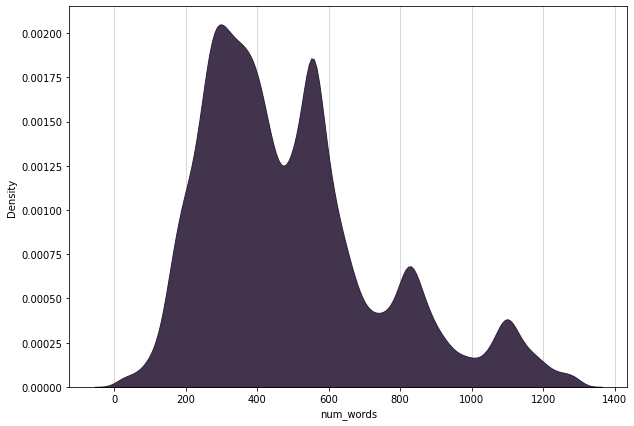

In [19]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
ax.grid(color="lightgrey", axis="x", zorder=0)
sns.kdeplot(x="num_words", fill=True, alpha=0.9, color=palette[0], data=external_dataset, zorder=2, ax=ax)
fig.show()

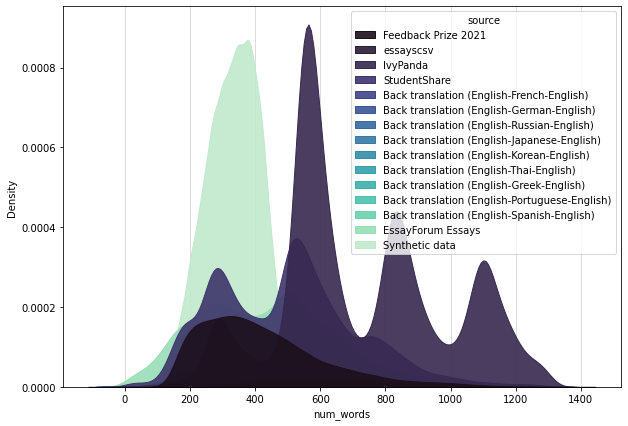

In [20]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
ax.grid(color="lightgrey", axis="x", zorder=0)
sns.kdeplot(x="num_words", hue="source", fill=True, alpha=0.9, palette="mako", data=external_dataset, zorder=2, ax=ax)
fig.show()

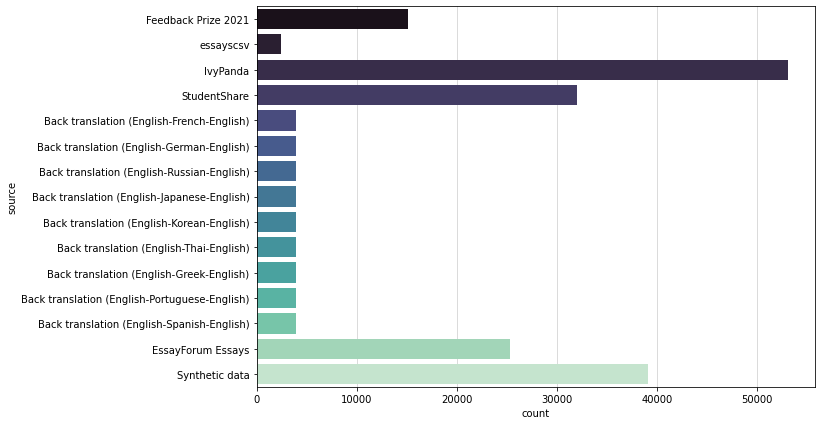

In [21]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot()
ax.grid(color="lightgrey", axis="x", zorder=0)
sns.countplot(y="source", palette="mako", data=external_dataset, zorder=2, ax=ax)
fig.show()